Cod Propriu PIB

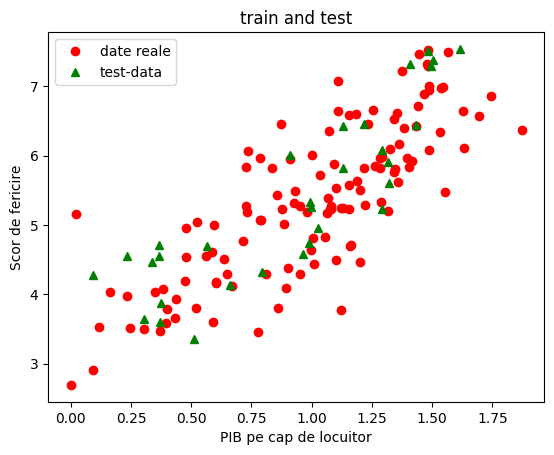

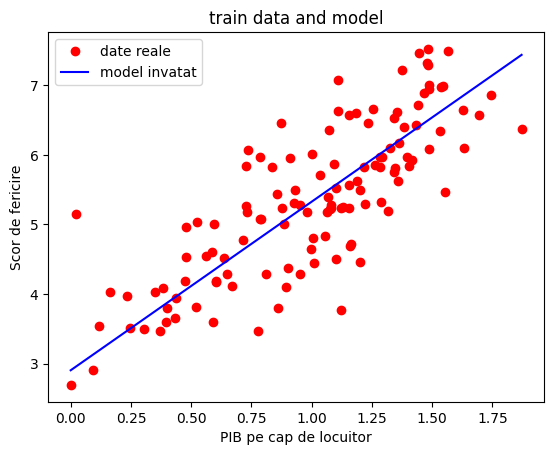

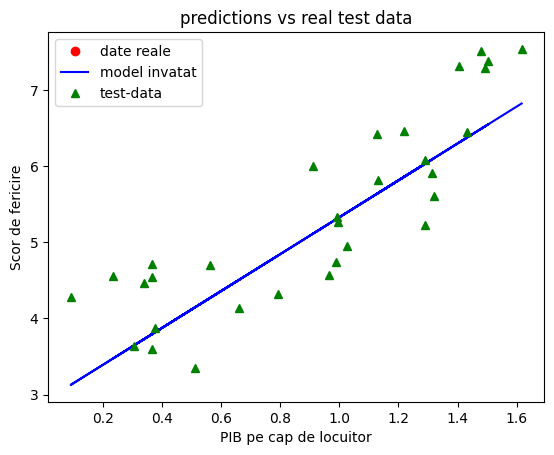

Eroare medie patratica: 0.4252


In [6]:
import os  
import numpy as np  

def loadData(fileName, inputVariabName, outputVariabName='Happiness.Score'):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    selectedVariable = dataNames.index(inputVariabName)
    selectedOutput = dataNames.index(outputVariabName)  

    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]  
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]  
    
    return inputs, outputs

def plotData(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None):
    plt.plot(x1, y1, 'ro', label='date reale')
    if x2 is not None and y2 is not None:
        plt.plot(x2, y2, 'b-', label='model invatat')
    if x3 is not None and y3 is not None:
        plt.plot(x3, y3, 'g^', label='test-data')
    plt.title(title)
    plt.xlabel('PIB pe cap de locuitor')
    plt.ylabel('Scor de fericire')
    plt.legend()
    plt.show()

# Functie pentru gradient descrescator - doar PIB
def batchGradientDescentSingle(X, y, learning_rate=0.01, epochs=1000):
    n = len(X)
    w0 = 0  # Intercept initial
    w1 = 0  # Coeficient initial pentru PIB
    
    for epoch in range(epochs):
        # Calculam predictiile
        y_pred = [w0 + w1 * x for x in X]
        
        # Calculam gradientii
        grad_w0 = (1/n) * sum(y_pred[i] - y[i] for i in range(n))
        grad_w1 = (1/n) * sum((y_pred[i] - y[i]) * X[i] for i in range(n))
        
        # Actualizam parametrii
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
    
    return w0, w1

#eroarea medie patratica
def meanSquaredError(y_true, y_pred):
    n = len(y_true)
    return sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n


filePath = os.path.join(os.getcwd(),'v1_world-happiness-report-2017.csv')


inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.')

# Impartim datele in antrenament (80%) si testare (20%)
np.random.seed(5)
indexes = list(range(len(inputs)))
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


plotData(trainInputs, trainOutputs, None, None, testInputs, testOutputs, "train and test")

# Antrenam modelul cu gradient descrescator
w0, w1 = batchGradientDescentSingle(trainInputs, trainOutputs, learning_rate=0.01, epochs=1000)


# Generam puncte pentru grafic
xref = np.linspace(min(trainInputs), max(trainInputs), 100)
yref = [w0 + w1 * x for x in xref]

# Grafic 2: Datele de antrenament si modelul invatat
plotData(trainInputs, trainOutputs, xref, yref, None, None, "train data and model")

# Facem predictii pe datele de testare
testPredictions = [w0 + w1 * x for x in testInputs]

# Grafic 3: Predictii vs date reale de testare
plotData([], [], testInputs, testPredictions, testInputs, testOutputs, "predictions vs real test data")
# Calculam si afisam eroarea
error = meanSquaredError(testOutputs, testPredictions)
print(f"Eroare medie patratica: {error:.4f}")

In [15]:
import csv  
import os  
import matplotlib.pyplot as plt  
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D  

def loadData(fileName, inputVariabName1, inputVariableName2, outputVariabName='Happiness.Score'):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=",")
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    
    selectedVariable = dataNames.index(inputVariabName1)
    selectedVariable2 = dataNames.index(inputVariableName2)
    selectedOutput = dataNames.index(outputVariabName)  

    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]  
    inputs2 = [float(data[i][selectedVariable2]) for i in range(len(data))]
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]  
    
    return inputs, inputs2, outputs


def plotData(x1, y1, x2=None, y2=None, x3=None, y3=None, title=None, x_label='PIB pe cap de locuitor', y_label='Scor de fericire'):
    plt.plot(x1, y1, 'ro', label='train data')  
    if x2 is not None and y2 is not None:
        plt.plot(x2, y2, 'b-', label='learnt model')  
    if x3 is not None and y3 is not None:
        plt.plot(x3, y3, 'g^', label='test data')  
    plt.title(title)
    plt.xlabel(x_label)  
    plt.ylabel(y_label)  
    plt.legend()
    plt.show()
    
# Functie pentru gradient descrescator
def batchGradientDescentMultiple(X1, X2, y, learning_rate=0.01, epochs=1000):
    n = len(X1)
    w0 = 0  # Intercept 
    w1 = 0  # Coeficient PIB
    w2 = 0  # Coeficient Libertate
    
    for epoch in range(epochs):
        # Calculam predictiile
        y_pred = [w0 + w1 * x1 + w2 * x2 for x1, x2 in zip(X1, X2)]
        
        # Calculam gradientii
        grad_w0 = (1/n) * sum(y_pred[i] - y[i] for i in range(n))
        grad_w1 = (1/n) * sum((y_pred[i] - y[i]) * X1[i] for i in range(n))
        grad_w2 = (1/n) * sum((y_pred[i] - y[i]) * X2[i] for i in range(n))
        
        # Actualizam parametrii
        w0 -= learning_rate * grad_w0
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2
    
    return w0, w1, w2

# eroarea medie patratica
def meanSquaredError(y_true, y_pred):
    n = len(y_true)
    return sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n


filePath = os.path.join(os.getcwd(), 'v1_world-happiness-report-2017.csv')

inputs, inputs2, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Freedom')

# Impartim datele in antrenament (80%) si testare (20%)
np.random.seed(5)
indexes = list(range(len(inputs)))
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
testSample = [i for i in indexes if i not in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainInputs2 = [inputs2[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testInputs2 = [inputs2[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plotData(trainInputs, trainOutputs, None, None, testInputs, testOutputs, "train and test", x_label='PIB pe cap de locuitor')

plotData(trainInputs2, trainOutputs, None, None, testInputs2, testOutputs, "train and test", x_label='Libertate')

# Antrenam modelul cu gradient descrescator
w0, w1, w2 = batchGradientDescentMultiple(trainInputs, trainInputs2, trainOutputs, learning_rate=0.01, epochs=1000)

xref = np.linspace(min(trainInputs), max(trainInputs), 100)
yref = [w0 + w1 * x + w2 * np.mean(trainInputs2) for x in xref]  

plotData(trainInputs, trainOutputs, xref, yref, None, None, "train data and model", x_label='PIB pe cap de locuitor')

xref2 = np.linspace(min(trainInputs2), max(trainInputs2), 100)
yref2 = [w0 + w1 * np.mean(trainInputs) + w2 * x for x in xref2]  #


plotData(trainInputs2, trainOutputs, xref2, yref2, None, None, "train data and model", x_label='Libertate')


testPredictions = [w0 + w1 * x1 + w2 * x2 for x1, x2 in zip(testInputs, testInputs2)]

testPredictionsForPlot = [w0 + w1 * x + w2 * np.mean(testInputs2) for x in testInputs]

plotData([], [], testInputs, testPredictionsForPlot, testInputs, testOutputs, "predictions vs real test data", x_label='PIB pe cap de locuitor')

testPredictionsForPlot2 = [w0 + w1 * np.mean(testInputs) + w2 * x for x in testInputs2]

plotData([], [], testInputs2, testPredictionsForPlot2, testInputs2, testOutputs, "predictions vs real test data", x_label='Libertate')
error = meanSquaredError(testOutputs, testPredictions)
print(f"Eroare medie patratica: {error:.4f}")

# Grafic 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trainInputs, trainInputs2, trainOutputs, c='r', marker='o', label='Date antrenament')
X = np.linspace(min(trainInputs), max(trainInputs), 100)
Y = np.linspace(min(trainInputs2), max(trainInputs2), 100)
X, Y = np.meshgrid(X, Y)
Z = w0 + w1 * X + w2 * Y
ax.plot_surface(X, Y, Z, alpha=0.5, color='b', label='Model invatat')
ax.set_xlabel('PIB pe cap de locuitor')
ax.set_ylabel('Libertate')
ax.set_zlabel('Scor de fericire')
ax.set_title('Fericire vs PIB si Libertate')
plt.savefig("3d_happiness_plot.png")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\LENOVO\\PycharmProjects\\AI\\LAB6\\1\\v2_world-happiness-report-2017.csv'